<a href="https://colab.research.google.com/github/Samxiar/DeepLearning/blob/main/image_classification_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.**

**y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.**

**x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.**

**y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.**

*Data available at https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz*

**License
Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

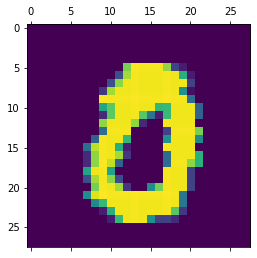

In [ ]:
# Checking the Digit
plt.matshow(x_train[69])

In [ ]:
# Confirming the Digit
y_train[69]

0

*Flattening the image array to one single row using the **'RESHAPE'** function*

In [ ]:
# Creating the first (Input) Layer in the Neural Network.

x_tflat = x_train.reshape(len(x_train),28*28)
x_tflat.shape

(60000, 784)

In [ ]:
x_teflat = x_test.reshape(len(x_test),28*28)
x_teflat.shape

(10000, 784)

*Training and Testing data samples are flattened as a Input Layer for the NN (Neural Network)*

**Using the Keras Sequencial Class:**

**The core idea of Sequential API is simply arranging the Keras layers in a sequential order and so, it is called Sequential API. Most of the ANN also has layers in sequential order and the data flows from one layer to another layer in the given order until the data finally reaches the output layer.**

A metric is a function that is used to judge the performance of your model.

Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. Note that you may use any loss function as a metric.

In [ ]:
# Dense refers to the connection of all the individual Neurons from one layer to every other Neuron in the next Layer.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
    ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_tflat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4667 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3043 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2839 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9261


*Epochs are just number of Iterations for the model*

**Accuracy is 92%**

In [ ]:
# Cross-checking the accuracy
model.evaluate(x_teflat,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2659 - accuracy: 0.9263


[0.26592791080474854, 0.9262999892234802]

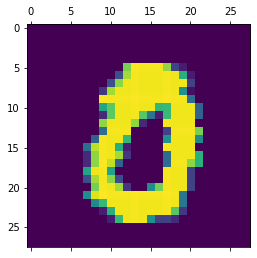

In [ ]:
plt.matshow(x_train[69])

In [ ]:
y_predicted = model.predict(x_teflat)
y_predicted[69]

313/313 [==============================] - 0s 1ms/step


array([9.9970376e-01, 7.8128631e-10, 1.8385671e-01, 2.0377287e-03,
       2.6750255e-08, 9.4558173e-01, 2.4865474e-01, 1.0358593e-03,
       2.0028766e-02, 5.9560994e-06], dtype=float32)

In [ ]:
# np.argmax displays the index of the highest value in the given list of elements.
np.argmax(y_predicted[69])

0

In [ ]:
y_plabels = [np.argmax(n) for n in y_predicted]
y_plabels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [ ]:
# Building a Confusion Matrix.
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_plabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    6,    7,    3,    2,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,   11,  917,   19,    8,    5,   13,   11,   40,    4],
       [   2,    0,   17,  932,    0,   18,    2,   10,   21,    8],
       [   1,    1,    3,    1,  918,    0,   11,    4,   10,   33],
       [   8,    2,    2,   36,    9,  776,   19,    5,   28,    7],
       [   9,    3,    6,    1,    7,   11,  917,    2,    2,    0],
       [   1,    5,   21,    8,    7,    1,    0,  948,    3,   34],
       [   5,    9,    6,   25,    9,   26,   10,   12,  866,    6],
       [  10,    7,    1,   10,   27,    8,    0,   21,    8,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

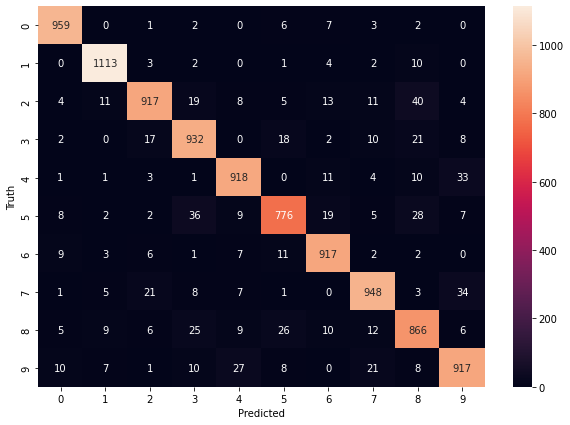

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Adding the Hidden Layer in the NN**

In [ ]:
# Adding the Hidden Layer in the NN

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),#Layer 1
    keras.layers.Dense(10, activation='sigmoid')#Layer 2
    ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_tflat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2671 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1218 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0882 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0679 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9839


In [ ]:
model.evaluate(x_teflat,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0982 - accuracy: 0.9706


[0.09823232144117355, 0.9706000089645386]

**Just by adding a hidden layer, the accuracy was raised from 92% to 97% !!!!**

In [56]:
#Using the Keras Flatten method.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1239 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0520 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0336 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0288 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0246 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [57]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9785


[0.08077636361122131, 0.9785000085830688]

**Refer : https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6 
for more activation Functions**